In [1]:
import tensorflow.keras 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Flatten, Dense, Dropout, Conv2D, BatchNormalization, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

/opt/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dty

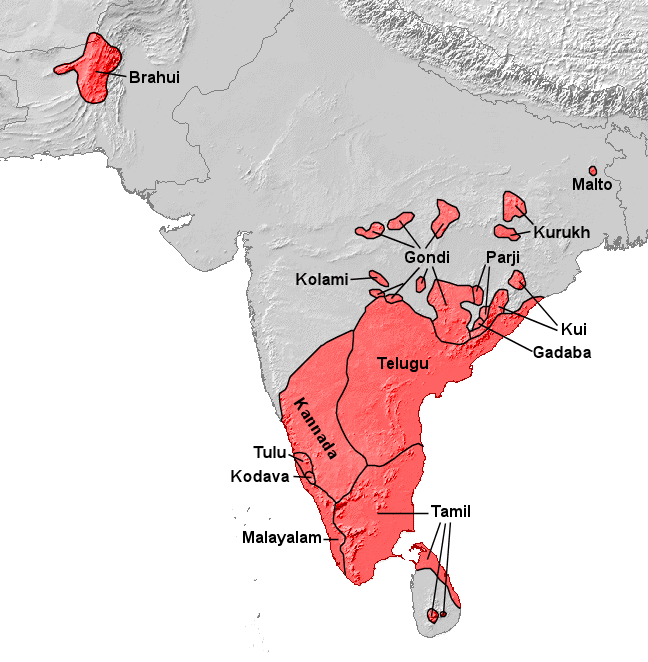

In [2]:
dravidian_lang = image.load_img('Dravidische_Sprachen.png')
dravidian_lang

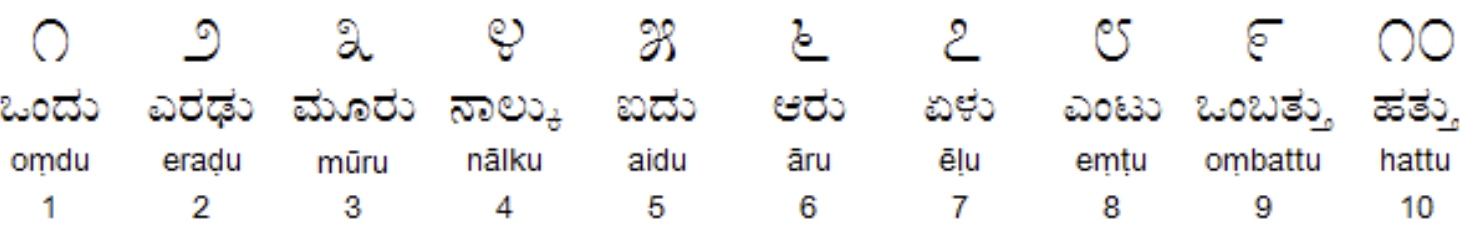

In [3]:
img = image.load_img('kannada_mnist.png')
img

In [4]:
# loading kannada data
train_kn = pd.read_csv('kannada_mnist_train.csv')
test_kn = pd.read_csv('kannada_mnist_test.csv')

In [5]:
train_kn.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
xtrain_kn = train_kn.iloc[:, 1:].values.astype('float32') / 255
ytrain_kn = train_kn.iloc[:, 0] # labels

In [7]:
xtest_kn = test_kn.iloc[:, 1:].values.astype('float32') / 255
ytest_kn = test_kn.iloc[:, 0] # labels

In [8]:
xtrain_kn = xtrain_kn.reshape(-1, 28, 28,1)
ytrain_kn = to_categorical(ytrain_kn)
xtest_kn = xtest_kn.reshape(-1, 28, 28,1)
ytest_kn = to_categorical(ytest_kn)

In [9]:
xtrain_kn.shape, xtest_kn.shape

((60000, 28, 28, 1), (5000, 28, 28, 1))

In [10]:
# load english data
(xtrain_en, ytrain_en), (xtest_en, ytest_en) = mnist.load_data()

In [11]:
xtrain_en.shape, xtest_en.shape

((60000, 28, 28), (10000, 28, 28))

In [12]:
xtrain_en = xtrain_en / 255.0
xtest_en = xtest_en / 255.0

In [13]:
xtrain_en = xtrain_en.astype(np.float32)
xtrain_en = xtrain_en.reshape(60000, 28, 28, 1)
ytrain_en = to_categorical(ytrain_en)
xtrain_en.shape, ytrain_en.shape

((60000, 28, 28, 1), (60000, 10))

In [14]:
xtest_en = xtest_en.astype(np.float32)
xtest_en = xtest_en.reshape(10000, 28, 28, 1)
ytest_en = to_categorical(ytest_en)
xtest_en.shape, ytest_en.shape

((10000, 28, 28, 1), (10000, 10))

In [15]:
K.clear_session()
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', mode = 'min', patience=10)

In [16]:
# define the model
model = Sequential([
    # First convolutional layer
    Conv2D(filters=32, kernel_size=(3,3), padding='same', 
          input_shape=(28, 28, 1)),
    MaxPool2D(pool_size=(2, 2)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.05),
    
    # Second convolutional layer
    Conv2D(filters=16, kernel_size=(3,3), padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.05),
    
    Flatten(),
    Dense(10),
    BatchNormalization(),
    Activation('softmax')
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
__________

In [18]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# fit the model
history_en = model.fit(xtrain_en, ytrain_en, batch_size=64, epochs=100, 
                   validation_split=0.2, callbacks=[callback])

Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
48000/48000 [==============================] - 22s 450us/sample - loss: 0.5091 - acc: 0.9244 - val_loss: 0.2614 - val_acc: 0.9749
Epoch 2/100
48000/48000 [==============================] - 22s 463us/sample - loss: 0.2073 - acc: 0.9732 - val_loss: 0.1240 - val_acc: 0.9829
Epoch 3/100
48000/48000 [==============================] - 21s 441us/sample - loss: 0.1386 - acc: 0.9782 - val_loss: 0.0908 - val_acc: 0.9856
Epoch 4/100
48000/48000 [==============================] - 21s 440us/sample - loss: 0.1065 - acc: 0.9818 - val_loss: 0.0788 - val_acc: 0.9866
Epoch 5/100
48000/48000 [==============================] - 21s 442us/sample - loss: 0.0866 - acc: 0.9840 - val_loss: 0.0545 - val_acc: 0.9882
Epoch 6/100
48000/48000 [==============================] - 21s 439us/sample - loss: 0.0754 - acc: 0.9841 - val_loss: 0.0472 - val_acc: 0.9889
Epoch 7/100
48000/48000 [=========================

In [20]:
model.evaluate(xtrain_en, ytrain_en)

60000/60000 [==============================] - 4s 69us/sample - loss: 0.0116 - acc: 0.9973


[0.01161709339315809, 0.99728334]

In [21]:
model.evaluate(xtest_en, ytest_en)

10000/10000 [==============================] - 1s 69us/sample - loss: 0.0306 - acc: 0.9912


[0.03059626353213098, 0.9912]

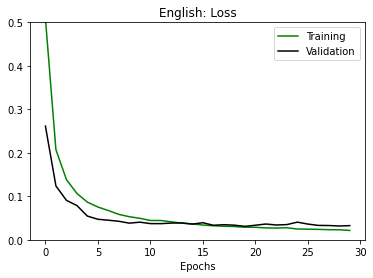

In [32]:
loss = history_en.history['loss']
val_loss = history_en.history['val_loss']
epochs = range(0,len(loss))
plt.plot(epochs, loss, 'g', label='Training')
plt.plot(epochs, val_loss, 'k', label='Validation')
plt.title('English: Loss')
plt.xlabel('Epochs')
plt.ylim(0,0.5)
plt.legend()
plt.show()

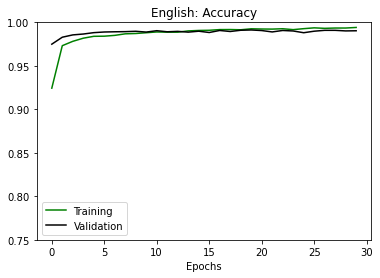

In [33]:
accuracy = history_en.history['acc']
val_accuracy = history_en.history['val_acc']
epochs = range(0,len(accuracy))
plt.plot(epochs, accuracy, 'g', label='Training')
plt.plot(epochs, val_accuracy, 'k', label='Validation')
plt.title('English: Accuracy')
plt.xlabel('Epochs')
plt.ylim(0.75, 1)
plt.legend()
plt.show()

### Freeze layers

In [24]:
model.layers[0].trainable = False  
model.layers[1].trainable = False  
model.layers[2].trainable = False  
model.layers[3].trainable = False  
model.layers[4].trainable = False  
model.layers[5].trainable = False  
model.layers[6].trainable = False  
model.layers[7].trainable = False  
model.layers[8].trainable = False  
model.layers[9].trainable = False  
model.layers[10].trainable = False  

In [25]:
# fit model to kannada mnist

In [26]:
history_kn = model.fit(xtrain_kn, ytrain_kn, batch_size=64, epochs=100, 
                   validation_split=0.2, callbacks=[callback])

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 23s 484us/sample - loss: 0.1839 - acc: 0.9525 - val_loss: 0.0321 - val_acc: 0.9900
Epoch 2/100
48000/48000 [==============================] - 23s 472us/sample - loss: 0.0602 - acc: 0.9817 - val_loss: 0.0239 - val_acc: 0.9924
Epoch 3/100
48000/48000 [==============================] - 23s 471us/sample - loss: 0.0454 - acc: 0.9870 - val_loss: 0.0276 - val_acc: 0.9910
Epoch 4/100
48000/48000 [==============================] - 23s 471us/sample - loss: 0.0380 - acc: 0.9887 - val_loss: 0.0223 - val_acc: 0.9934
Epoch 5/100
48000/48000 [==============================] - 23s 477us/sample - loss: 0.0335 - acc: 0.9900 - val_loss: 0.0222 - val_acc: 0.9928
Epoch 6/100
48000/48000 [==============================] - 589s 12ms/sample - loss: 0.0301 - acc: 0.9916 - val_loss: 0.0266 - val_acc: 0.9917
Epoch 7/100
48000/48000 [==============================] - 26s 543us/sample - loss: 0.0271 - acc: 

In [27]:
model.evaluate(xtrain_kn, ytrain_kn)

60000/60000 [==============================] - 4s 70us/sample - loss: 0.0071 - acc: 0.9982


[0.007148333761650914, 0.9982167]

In [28]:
#model.evaluate(xtest_kn, ytest_kn)

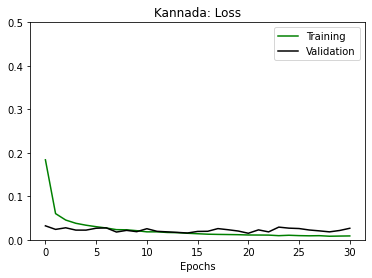

In [36]:
loss = history_kn.history['loss']
val_loss = history_kn.history['val_loss']
epochs = range(0,len(loss))
plt.plot(epochs, loss, 'g', label='Training')
plt.plot(epochs, val_loss, 'k', label='Validation')
plt.title('Kannada: Loss')
plt.xlabel('Epochs')
plt.ylim(0,0.5)
plt.legend()
plt.show()

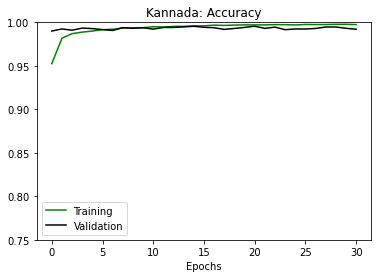

In [35]:
accuracy = history_kn.history['acc']
val_accuracy = history_kn.history['val_acc']
epochs = range(0,len(accuracy))
plt.plot(epochs, accuracy, 'g', label='Training')
plt.plot(epochs, val_accuracy, 'k', label='Validation')
plt.title('Kannada: Accuracy')
plt.xlabel('Epochs')
plt.ylim(0.75, 1)
plt.legend()
plt.show()